In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt

In [16]:
df_full = pd.read_csv('../../twitter_dataset/cleaned.csv', sep=';', encoding='cp437', usecols=range(1,8))
df_tag = pd.read_csv('../../twitter_dataset/cleaned_hashtag.csv', sep=';', encoding='cp437', usecols=range(1,8))
df_at = pd.read_csv('../../twitter_dataset/cleaned_identification.csv', sep=';', encoding='cp437', usecols=range(1,8))

C:\Users\bruno\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [66]:
df_full['day'] = df_full.createdAt.apply(lambda x : x[:10])
df_full['month'] = df_full.createdAt.apply(lambda x : x[:7])
df_full['year'] = df_full.createdAt.apply(lambda x : x[:4])
df_at['day'] = df_at.createdAt.apply(lambda x : x[:10])
df_at['month'] = df_at.createdAt.apply(lambda x : x[:7])
df_at['year'] = df_at.createdAt.apply(lambda x : x[:4])
df_tag['day'] = df_tag.createdAt.apply(lambda x : x[:10])
df_tag['month'] = df_tag.createdAt.apply(lambda x : x[:7])
df_tag['year'] = df_tag.createdAt.apply(lambda x : x[:4])

In [19]:
df_tag.head(20)

,id,userId,createdAt,Longitude,Latitude,username,tag,day,month,year
0,9519737890,14657884,2010-02-23 09:59:41,\N,\N,Javier Belmonte,['#fb'],2010-02-23,2010-02,2010
1,9521789689,9962022,2010-02-23 11:28:27,\N,\N,Thomas Winter,['#yam'],2010-02-23,2010-02,2010
2,9535390586,921241,2010-02-23 17:47:11,\N,\N,Markus Tressl,"['#24', '#VfB']",2010-02-23,2010-02,2010
3,9536575795,14260616,2010-02-23 18:19:03,\N,\N,Roman Keller,['#iPhoneography'],2010-02-23,2010-02,2010
4,9537030723,14542024,2010-02-23 18:31:46,\N,\N,Joe Maffia,['#partnermonth'],2010-02-23,2010-02,2010
5,9564394826,17910879,2010-02-24 06:09:23,\N,\N,Eloy Castro,"['#insider', '#fb']",2010-02-24,2010-02,2010
6,9566536362,14260616,2010-02-24 07:33:49,\N,\N,Roman Keller,['#Blick'],2010-02-24,2010-02,2010
7,9574517245,14328442,2010-02-24 12:58:35,\N,\N,johnbfagan,['#WIN'],2010-02-24,2010-02,2010
8,9611648082,17910879,2010-02-25 04:50:41,\N,\N,Eloy Castro,['#wach'],2010-02-25,2010-02,2010
9,9611851919,13549872,2010-02-25 04:56:37,\N,\N,{Donmartino},"['#bwin', '#vancouver2010']",2010-02-25,2010-02,2010


In [20]:
def search_hashtag(tag, df):
    return df[(df["tag"].str.contains(tag))]


In [21]:
df_Charlie = search_hashtag("'#JeSuisCharlie'", df_tag)
df_Charlie

,id,userId,createdAt,Longitude,Latitude,username,tag,day,month,year
2122740,552806885053988865,414754156,2015-01-07 12:40:06,46.5287,6.65208,Ad-exchange.fr,"['#CharlieHebdo', '#JeSuisCharlie']",2015-01-07,2015-01,2015
2122747,552807441407434752,448198451,2015-01-07 12:42:19,46.2048,6.14319,Johan Monterrat,"['#Cabu', '#CharlieHebdo', '#JeSuisCharlie']",2015-01-07,2015-01,2015
2122750,552807881012424705,448198451,2015-01-07 12:44:04,46.2048,6.14319,Johan Monterrat,"['#JeSuisCharlie', '#CharlieHebdo']",2015-01-07,2015-01,2015
2122753,552808602835369984,448198451,2015-01-07 12:46:56,46.2048,6.14319,Johan Monterrat,"['#Charb', '#CharlieHebdo', '#JeSuisCharlie']",2015-01-07,2015-01,2015
2122763,552809303636475904,129821394,2015-01-07 12:49:43,46.8031,7.15962,iBruno ?,"['#JeSuisCharlie', '#CharlieHebdo']",2015-01-07,2015-01,2015
2122765,552809353657729024,391267192,2015-01-07 12:49:55,46.01,7.3331,brossette cedric,['#JeSuisCharlie'],2015-01-07,2015-01,2015
2122779,552810466050052096,634553,2015-01-07 12:54:20,46.1795,6.14126,David Roessli,"['#CharlieHebdo', '#JeSuisCharlie']",2015-01-07,2015-01,2015
2122788,552810870871703552,47965291,2015-01-07 12:55:57,46.8031,7.15962,Izanami,"['#CharlieHebdo', '#JeSuisCharlie']",2015-01-07,2015-01,2015
2122801,552812124133937152,448198451,2015-01-07 13:00:55,46.2048,6.14319,Johan Monterrat,"['#CharlieHebdo', '#Charb', '#Cabu', '#JeSuisC...",2015-01-07,2015-01,2015
2122822,552814433282846720,163045597,2015-01-07 13:10:06,46.3823,6.59175,Jacques Bechet,['#JeSuisCharlie'],2015-01-07,2015-01,2015


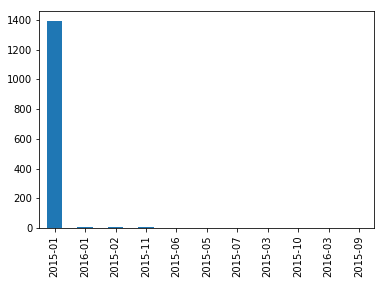

In [22]:
df_Charlie['month'].value_counts().plot.bar()
plt.show()

In [23]:
dfs = search_hashtag("'#newyearrocks'", df_tag)
dfs['day'].value_counts()

2014-01-02    38256
Name: day, dtype: int64

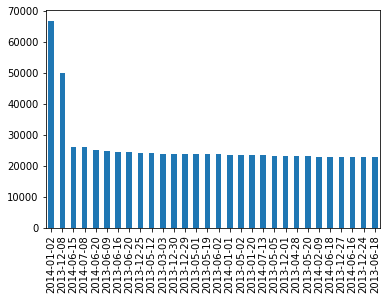

In [24]:
df_full['day'].value_counts()[:30].plot.bar()
plt.show()

In [25]:
def plot_frequency_tags(df, col, tag, n):
    dfs = search_hashtag(tag, df)
    dfs[col].value_counts()[:n].sort_index().plot.bar()
    plt.show()

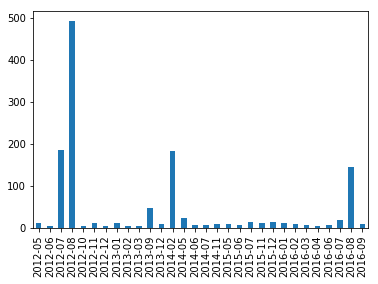

In [34]:
plot_frequency_tags(df_tag, 'month', "#JO", 30)

In [1]:
plot_frequency_tags(df_tag, 'day', "#JeSuisCharlie", 30)

NameError: name 'plot_frequency_tags' is not defined

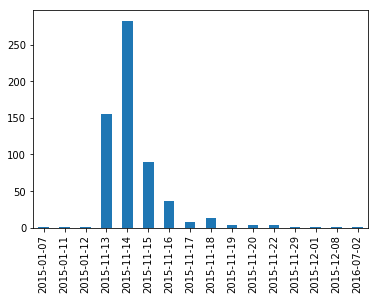

In [32]:
plot_frequency_tags(df_tag, 'day', "#PrayForParis", 30)

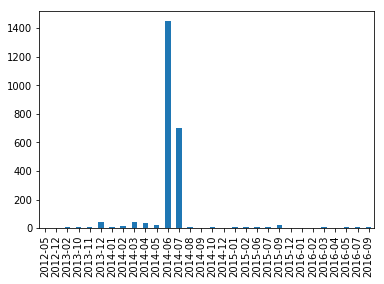

In [31]:
plot_frequency_tags(df_tag, 'month', "#WorldCup", 30)

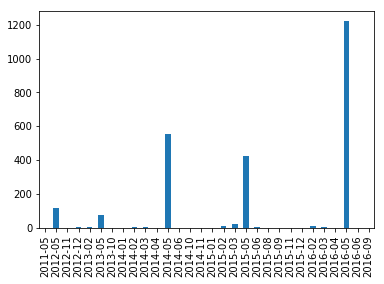

In [30]:
plot_frequency_tags(df_tag, 'month', "#Eurovision", 30)

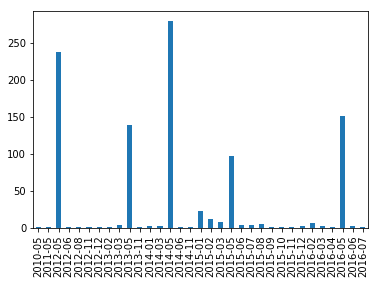

In [65]:
plot_frequency_tags(df_tag, 'month', "#eurovision", 100)